In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import datetime
import math
import seaborn as sns

In [3]:
google = pd.read_csv("/Users/basillatif/Desktop/Stock Data Project/googl_data.csv")
google

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,1063.90,1064.54,997.62,1006.9400,2940957.0,0.0,1.0,1063.900000,1064.540000,997.620000,1006.940000,2940957.0
1,2018-03-26,1050.60,1059.27,1010.58,1054.0900,3272409.0,0.0,1.0,1050.600000,1059.270000,1010.580000,1054.090000,3272409.0
2,2018-03-23,1051.37,1066.78,1024.87,1026.5500,2413517.0,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0
3,2018-03-22,1080.01,1083.92,1049.64,1053.1500,3418154.0,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
4,2018-03-21,1092.57,1108.70,1087.21,1094.0000,1990515.0,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,2007-11-07,741.13,747.24,723.14,732.9399,16530400.0,0.0,1.0,371.712441,374.776900,362.689588,367.604711,16530400.0
2613,2007-11-06,737.56,741.79,725.00,741.7900,16855700.0,0.0,1.0,369.921914,372.043463,363.622468,372.043463,16855700.0
2614,2007-11-05,706.99,730.23,706.07,725.6500,17749600.0,0.0,1.0,354.589584,366.245565,354.128160,363.948474,17749600.0
2615,2007-11-02,710.51,713.58,697.34,711.2500,11671300.0,0.0,1.0,356.355034,357.894787,349.749644,356.726180,11671300.0


In [6]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 13 columns):
Date           2617 non-null object
Open           2617 non-null float64
High           2617 non-null float64
Low            2617 non-null float64
Close          2617 non-null float64
Volume         2617 non-null float64
Ex-Dividend    2617 non-null float64
Split Ratio    2617 non-null float64
Adj. Open      2617 non-null float64
Adj. High      2617 non-null float64
Adj. Low       2617 non-null float64
Adj. Close     2617 non-null float64
Adj. Volume    2617 non-null float64
dtypes: float64(12), object(1)
memory usage: 265.9+ KB


In [11]:
#Changing the type of the 'Date' column and making it the index and sorting by it 
google['Date'] = pd.to_datetime(google['Date'])
google.index = google['Date']
google = google.sort_index()
google

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,
2007-11-01,2007-11-01,702.79,713.72,701.78,703.2100,13041300.0,0.0,1.0,352.483082,357.965004,351.976518,352.693732,13041300.0
2007-11-02,2007-11-02,710.51,713.58,697.34,711.2500,11671300.0,0.0,1.0,356.355034,357.894787,349.749644,356.726180,11671300.0
2007-11-05,2007-11-05,706.99,730.23,706.07,725.6500,17749600.0,0.0,1.0,354.589584,366.245565,354.128160,363.948474,17749600.0
2007-11-06,2007-11-06,737.56,741.79,725.00,741.7900,16855700.0,0.0,1.0,369.921914,372.043463,363.622468,372.043463,16855700.0
2007-11-07,2007-11-07,741.13,747.24,723.14,732.9399,16530400.0,0.0,1.0,371.712441,374.776900,362.689588,367.604711,16530400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,2018-03-21,1092.57,1108.70,1087.21,1094.0000,1990515.0,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,2018-03-22,1080.01,1083.92,1049.64,1053.1500,3418154.0,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,2018-03-23,1051.37,1066.78,1024.87,1026.5500,2413517.0,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [12]:
google.shape

(2617, 13)

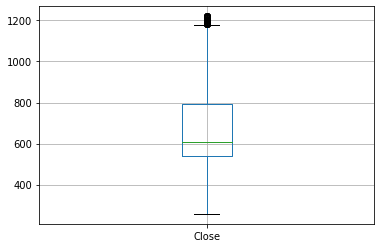

In [13]:
g__c_boxplot = google.boxplot(column = 'Close')

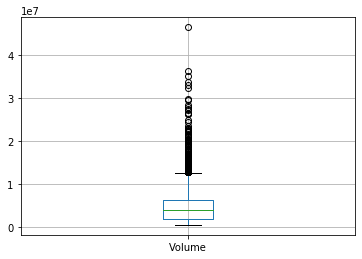

In [14]:
g_v_boxplot = google.boxplot(column = 'Volume')

In [20]:
#Coding rolling means 
close_px = google['Adj. Close']
mavg = close_px.rolling(window=10).mean()
fifty_mavg = close_px.rolling(window=50).mean()
twohun_mavg = close_px.rolling(window=200).mean()

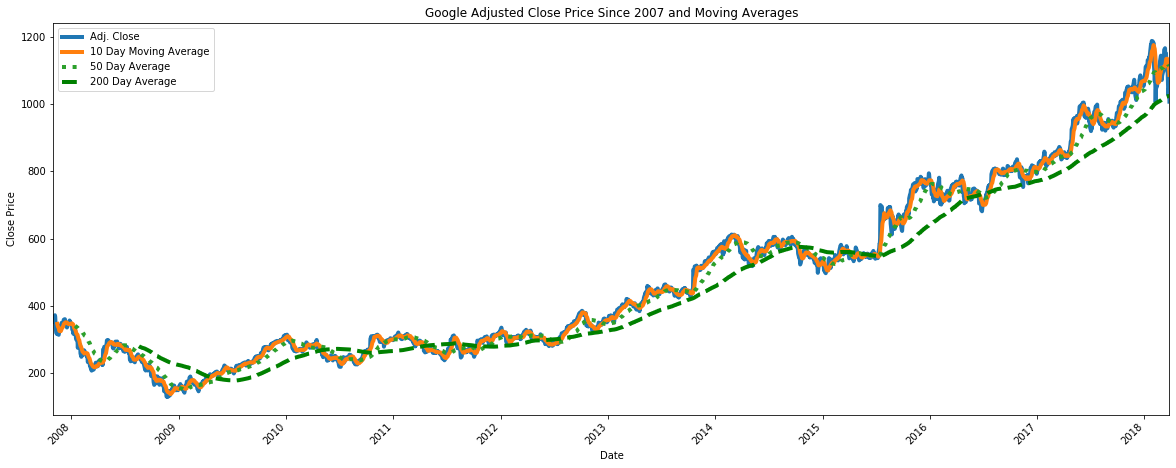

In [27]:
#Plotting the adjusted closing price 
plt.figure(figsize=(20,8))
plt.plot('Date','Adj. Close', data=google, linewidth = 4)
mavg.plot(label='10 Day Moving Average', linewidth = 4)
fifty_mavg.plot(label='50 Day Average', linestyle = 'dotted', linewidth = 4)
twohun_mavg.plot(label='200 Day Average', linestyle = 'dashed', color = 'green', linewidth = 4)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.title("Google Adjusted Close Price Since 2007 and Moving Averages")
plt.legend()

Text(0.5, 1.0, 'Google Stock Price Since 2007')

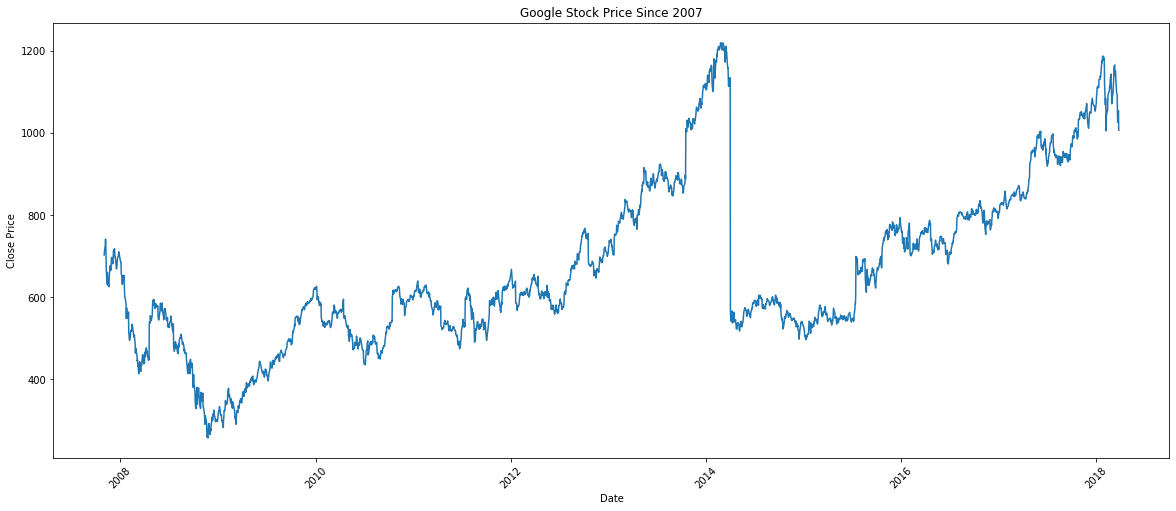

In [16]:
#Plotting the Closing Price 
plt.figure(figsize=(20,8))
plt.plot('Date','Close', data=google)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.title("Google Stock Price Since 2007")

Text(0.5, 1.0, 'Google Stock Volume By Date')

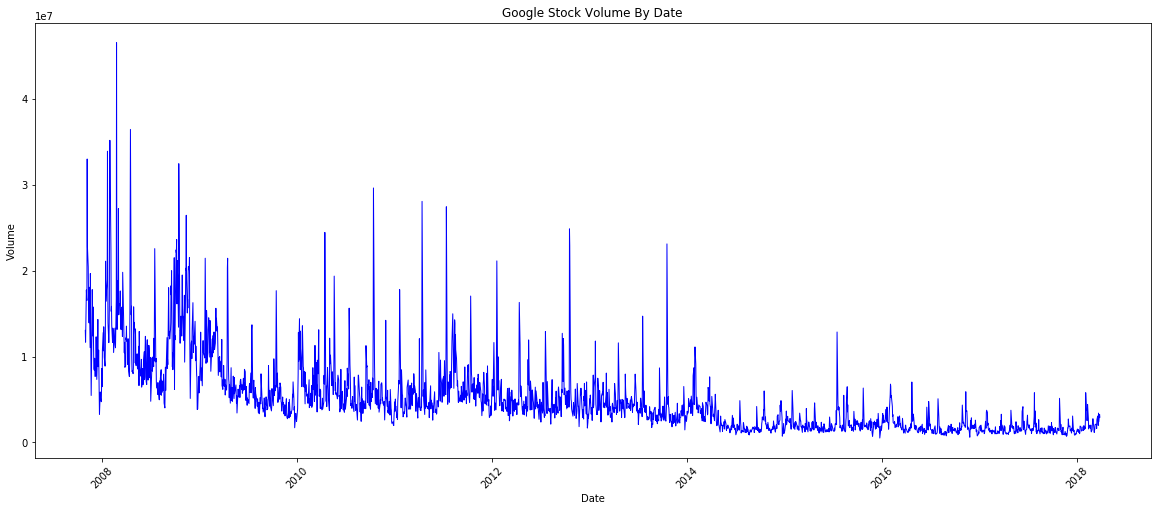

In [34]:
#Volume Charts 
plt.figure(figsize=(20,8))
plt.plot('Date','Volume', data=google, color = "blue", linewidth = 1.0)
#plt.plot('Date','Adj. Close', data=google, color = "red", linewidth = 1.0)

#plt.plot('Adj. Close', data=google)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.title('Google Stock Volume By Date')